<a href="https://colab.research.google.com/github/AlyanaJusino/lab4/blob/main/lab4code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [21]:
#Using data uploaded from github to data
github_url = 'https://raw.githubusercontent.com/AlyanaJusino/lab4/refs/heads/main/actualldataw1k.csv'
# Using dataframe to create the rows and columns of the data, organizing it by title
df = pd.read_csv(github_url, header=None, names=['T_ms', 'A_0'])

In [22]:
#test print to see if data is correctly written
print(df)

        T_ms  A_0
0          1    7
1          1    7
2          1    7
3          1    6
4          2    8
...      ...  ...
62597  33703   19
62598  33703   20
62599  33704   19
62600  33704   19
62601  33705   19

[62602 rows x 2 columns]


In [23]:
t_ms = df['T_ms'].values
A_0 = df['A_0'].values

In [24]:
#converting

time_ins = t_ms/1000 #ms to s
dt = np.mean(np.diff(time_ins)) #avg
fs = 1 / dt #freq

In [25]:
#fft

fft_result = np.fft.fft(A_0)
fft_freq = np.fft.fftfreq(len(A_0), dt)

mag = np.abs(fft_result)
positive_freq_idx= np.where(fft_freq >=0)

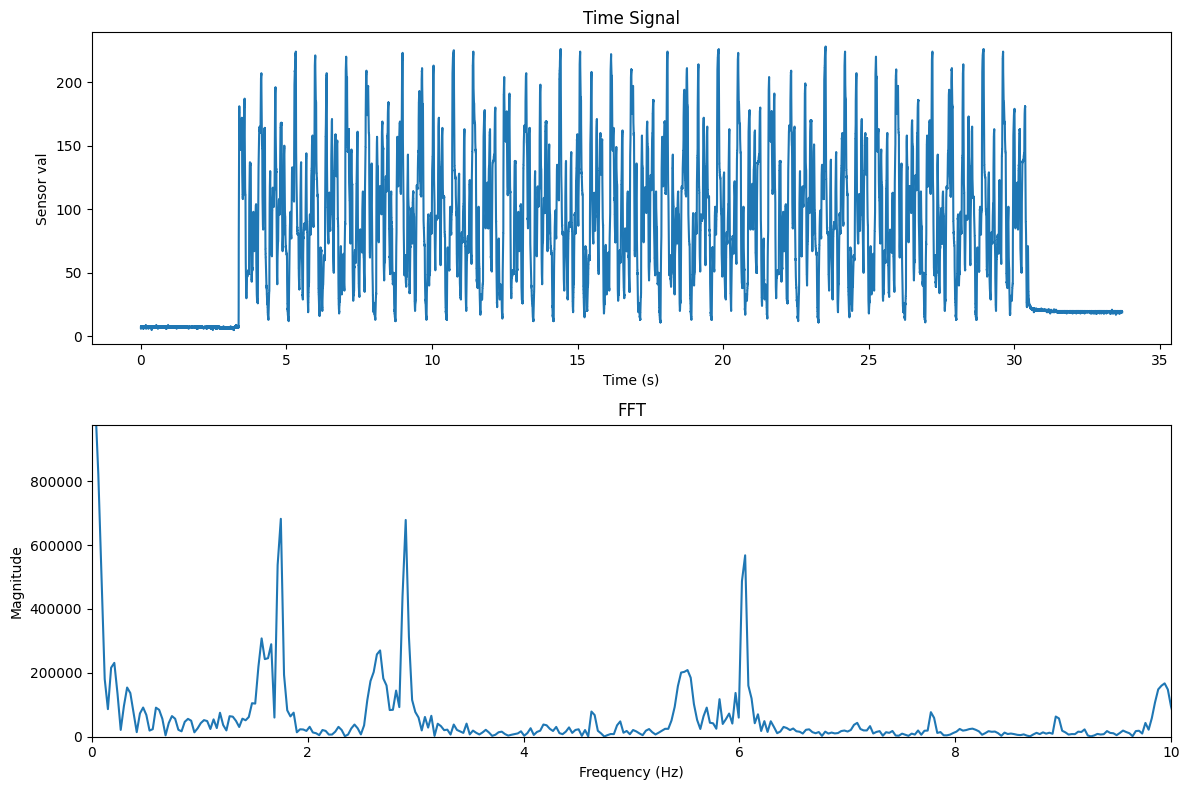

In [26]:
#plotting

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_ins, data)
plt.title('Time Signal')
plt.xlabel('Time (s)')
plt.ylabel('Sensor val')

plt.subplot(2, 1, 2)
plt.plot(fft_freq[positive_freq_idx], mag[positive_freq_idx])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, min(10,fft_freq[positive_freq_idx].max()))
plt.ylim(0,0.2*np.max(mag[positive_freq_idx]))
plt.tight_layout()
plt.show()